In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Veriyi 0 ve 1 arasına sıkıştırmak için
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
file_path = ('BankNoteAuthentication.csv')
data = pd.read_csv(file_path)

In [2]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
import time
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a synthetic dataset (for example purposes)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegressionGD Class as you defined
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None  # Model katsayıları (weights)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)  # Tüm ağırlıkları sıfır başlat

        for _ in range(self.epochs):
            z = np.dot(X, self.theta)  # Lineer model
            predictions = self.sigmoid(z)  # Sigmoid fonksiyonu uygula
            gradient = np.dot(X.T, (predictions - y)) / m  # Gradyan hesapla
            self.theta -= self.learning_rate * gradient  # Güncelle

    def predict(self, X):
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return [1 if p >= 0.5 else 0 for p in probabilities]

# Modeli eğit
log_reg_gd = LogisticRegressionGD(learning_rate=0.1, epochs=5000)
start_time = time.time()
log_reg_gd.fit(X_train_scaled, y_train)
train_time_manual = time.time() - start_time

# Tahmin yap
start_time = time.time()
y_pred_manual = log_reg_gd.predict(X_test_scaled)
predict_time_manual = time.time() - start_time

# Performans değerlendirmesi
accuracy_manual = accuracy_score(y_test, y_pred_manual)
conf_matrix_manual = confusion_matrix(y_test, y_pred_manual)

print(f"Manual Logistic Regression Accuracy: {accuracy_manual:.4f}")
print(f"Eğitim süresi: {train_time_manual:.4f} saniye")
print(f"Tahmin süresi: {predict_time_manual:.4f} saniye")
print("Confusion Matrix (Manual):")
print(conf_matrix_manual)


Manual Logistic Regression Accuracy: 0.8550
Eğitim süresi: 0.0692 saniye
Tahmin süresi: 0.0001 saniye
Confusion Matrix (Manual):
[[86  7]
 [22 85]]


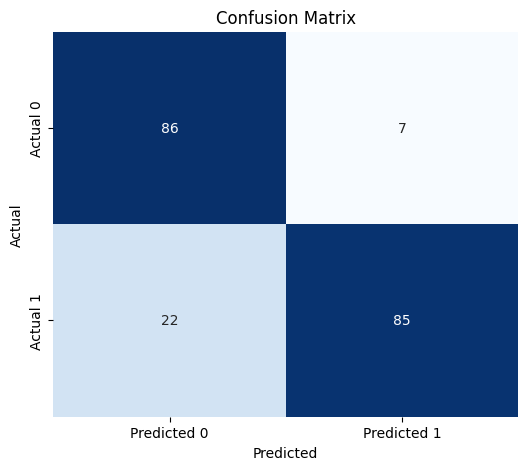

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_manual = confusion_matrix(y_test, y_pred_manual)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_manual, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_manual = precision_score(y_test, y_pred_manual)
recall_manual = recall_score(y_test, y_pred_manual)
f1_manual = f1_score(y_test, y_pred_manual)

print("Manual Model Performansı:")
print(f"Precision: {precision_manual:.4f}")
print(f"Recall: {recall_manual:.4f}")
print(f"F1-Score: {f1_manual:.4f}")

Manual Model Performansı:
Precision: 0.9239
Recall: 0.7944
F1-Score: 0.8543
